In [1]:
#API: I37T0DG04XQQ79GE
#reference: https://www.alphavantage.co/documentation/

❚ Required: function

The function of your choice. In this case, function=NEWS_SENTIMENT

❚ Optional: tickers

The stock/crypto/forex symbols of your choice. For example: tickers=IBM will filter for articles that mention the IBM ticker; tickers=COIN,CRYPTO:BTC,FOREX:USD will filter for articles that simultaneously mention Coinbase (COIN), Bitcoin (CRYPTO:BTC), and US Dollar (FOREX:USD) in their content.

❚ Optional: topics

The news topics of your choice. For example: topics=technology will filter for articles that write about the technology sector; topics=technology,ipo will filter for articles that simultaneously cover technology and IPO in their content. Below is the full list of supported topics:

Blockchain: blockchain
Earnings: earnings
IPO: ipo
Mergers & Acquisitions: mergers_and_acquisitions
Financial Markets: financial_markets
Economy - Fiscal Policy (e.g., tax reform, government spending): economy_fiscal
Economy - Monetary Policy (e.g., interest rates, inflation): economy_monetary
Economy - Macro/Overall: economy_macro
Energy & Transportation: energy_transportation
Finance: finance
Life Sciences: life_sciences
Manufacturing: manufacturing
Real Estate & Construction: real_estate
Retail & Wholesale: retail_wholesale
Technology: technology


❚ Optional: time_from and time_to

The time range of the news articles you are targeting, in YYYYMMDDTHHMM format. For example: time_from=20220410T0130. If time_from is specified but time_to is missing, the API will return articles published between the time_from value and the current time.

❚ Optional: sort

By default, sort=LATEST and the API will return the latest articles first. You can also set sort=EARLIEST or sort=RELEVANCE based on your use case.

❚ Optional: limit

By default, limit=50 and the API will return up to 50 matching results. You can also set limit=200 to output up to 200 results. If you are looking for an even higher output limit, please contact support@alphavantage.co to have your limit boosted.

❚ Required: apikey

Your API key. Claim your free API key here.

In [49]:
import requests
import json
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import datetime
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

class cryptoNews:
    
    def __init__(self, tickers ='AAPL', topics = '', \
                 time_from = '20220918T0000', time_to = '', sort='EARLIEST', limit=50, apikey = 'I37T0DG04XQQ79GE'):
        
        self.function = 'NEWS_SENTIMENT'
        self.tickers = tickers
        self.topics = topics
        self.time_from = time_from
        self.time_to = time_to
        self.sort = sort
        self.limit = limit
        self.apikey = apikey
        self.url = """https://www.alphavantage.co/query?function={}&tickers={}&topics={}&time_from={}&time_to={}&sort={}&limit={}&apikey={}""".format(self.function, self.tickers, self.topics, \
                                                                                                                                                      self.time_from, self.time_to, self.sort, \
                                                                                                                                                      self.limit, self.apikey) 
        self.DataFrame = None
        
    def getJson(self):
        
        r = requests.get(self.url)
        data = r.json()
        
        return data
    
    def getfeed(self):
        try:
            feed = self.getJson()['feed']
        except:
            feed = False
            
        return feed
    
    def getDataFrame(self):
        json = self.getJson()
        try:
            feed = json['feed']
        except:
            feed = False
            
        if feed:
            self.DataFrame = pd.DataFrame.from_dict(feed)
            return self.DataFrame
        return feed

# Demo
Refer to https://www.alphavantage.co/documentation/
- Don't need to change topics 
- tickers: For example: tickers='IBM' will filter for articles that mention the IBM ticker; tickers='COIN,CRYPTO:BTC,FOREX:USD' will filter for articles that simultaneously mention Coinbase (COIN), Bitcoin (CRYPTO:BTC), and US Dollar (FOREX:USD) in their content.
- time_from format: YYYYMMDDTHHHMM Example: "20220410T0130" means 2022-04-10, 1:30am UTC.
- time_to format: the same as time_to if none, using the current time
- sort: order: "EARLIEST", "LAST", "RELEVANCE" "EARLIEST" by default
- limit: number of articles
- apikey: the author of this notebook already got the apikey. You can use his but feel free to get your own one

*Note*: The limit of each query should be 200 so if you want to get long historical data, you can create cryptoNews iteratively by segmenting long history into many small time periods (1 or 2 days?)

Say we want to get all news about crypto btc from 2022-09-18, 00:00am UTC to now.

In [3]:
newsdata = cryptoNews(tickers = 'CRYPTO:BTC', time_from = '20220918T0000')

In [6]:
newsdata.getDataFrame().head()

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,Cryptocurrency Prices Today September 18: Majo...,https://www.moneycontrol.com/news/business/cry...,20220918T030751,[],The total volume in DeFi stood at $3.86 billio...,https://images.moneycontrol.com/static-mcnews/...,Money Control,Business,www.moneycontrol.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.095389,Neutral,"[{'ticker': 'CRYPTO:BTC', 'relevance_score': '..."
1,What are the disadvantages of blockchain | The...,https://www.financialexpress.com/blockchain/wh...,20220918T060410,[],What are the disadvantages of blockchain The F...,https://www.financialexpress.com/wp-content/up...,The Financial Express,IndustryGoogleRSS,www.financialexpress.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.043527,Neutral,"[{'ticker': 'CRYPTO:ETH', 'relevance_score': '..."
2,Binance misallocates $20M Helium's HNT tokens ...,https://www.financialexpress.com/blockchain/bi...,20220918T075821,[],Binance misallocates $20M Helium's HNT tokens ...,https://www.financialexpress.com/wp-content/up...,The Financial Express,MarketsGoogleRSS,www.financialexpress.com,[],-0.055256,Neutral,"[{'ticker': 'CRYPTO:BTC', 'relevance_score': '..."
3,South Korea recommends enactment of metaverse ...,https://www.financialexpress.com/blockchain/so...,20220918T085336,[],South Korea recommends enactment of metaverse ...,https://www.financialexpress.com/wp-content/up...,The Financial Express,IndustryGoogleRSS,www.financialexpress.com,[],0.108967,Neutral,"[{'ticker': 'CRYPTO:BTC', 'relevance_score': '..."
4,"Vietnam leads global crypto adoption, US comes...",https://www.financialexpress.com/blockchain/vi...,20220918T091455,[],"Vietnam leads global crypto adoption, US comes...",https://www.financialexpress.com/wp-content/up...,The Financial Express,MarketsGoogleRSS,www.financialexpress.com,"[{'topic': 'Blockchain', 'relevance_score': '0...",0.212005,Somewhat-Bullish,"[{'ticker': 'CRYPTO:BTC', 'relevance_score': '..."


# Get Top 50 Cryptocurrency Ticker

In [7]:
coingecko = requests.get('https://www.coingecko.com/')

In [8]:
soup=BeautifulSoup(coingecko.text,'lxml')

In [9]:
name = soup.select('body > div.container > div.gecko-table-container > div.coingecko-table > div.position-relative > div > table > tbody > tr > td.py-0.coin-name.cg-sticky-col.cg-sticky-third-col.px-0 > div > div.tw-flex-auto > a > span.lg\:tw-flex.font-bold.tw-items-center.tw-justify-between')
tickers = soup.select('body > div.container > div.gecko-table-container > div.coingecko-table > div.position-relative > div > table > tbody > tr > td.py-0.coin-name.cg-sticky-col.cg-sticky-third-col.px-0 > div > div.tw-flex-auto > a > span.d-lg-inline.font-normal.text-3xs.tw-ml-0.md\:tw-ml-2.md\:tw-self-center.tw-text-gray-500.dark\:tw-text-white.dark\:tw-text-opacity-60')

In [10]:
tickerList = []
for i in range(50):
    tickerList.append(re.sub('[^a-zA-z]', '', tickers[i].get_text()))

# Get News Text According to Ticker

No query: False or []

Time zone: UTC 

From 20220301 00:00 to 20220925 00:00 

Format: '%Y%m%dT%H%M'

In [50]:
start_datetime = datetime.datetime(2022, 3, 1, 0, 0)
end_datetime = datetime.datetime(2022,9, 25, 0, 0)

In [51]:
alldatetime = []

In [52]:
delta = datetime.timedelta(days = 1)
while(start_datetime < end_datetime):
    alldatetime.append(start_datetime)
    start_datetime = start_datetime + delta
alldatetime.append(end_datetime)

In [53]:
DataFrame = pd.DataFrame(index = alldatetime, columns = tickerList[5:8])

In [54]:
for ticker in tickerList[5:8]:
    for t in range(len(alldatetime) - 1):
        print(ticker)
        time.sleep(12)
        time_from = alldatetime[t].strftime('%Y%m%dT%H%M')
        time_to = alldatetime[t+1].strftime('%Y%m%dT%H%M')
        apiticker = 'CRYPTO:' + ticker
        print(time_from, time_to, apiticker)
        newsdata = cryptoNews(tickers=apiticker, time_from=time_from, time_to=time_to, limit = 200)
        newsdf = newsdata.getDataFrame()
        if isinstance(newsdf, pd.DataFrame):
            print(len(newsdf), time_to)
            DataFrame.loc[alldatetime[t+1], ticker] = [newsdf['title'].tolist(), newsdf['summary'].tolist(), \
                                                       newsdf['overall_sentiment_label'].tolist(),\
                                                       newsdf['time_published'].tolist()]

XRP
20220301T0000 20220302T0000 CRYPTO:XRP
XRP
20220302T0000 20220303T0000 CRYPTO:XRP
1 20220303T0000
XRP
20220303T0000 20220304T0000 CRYPTO:XRP
XRP
20220304T0000 20220305T0000 CRYPTO:XRP
XRP
20220305T0000 20220306T0000 CRYPTO:XRP
XRP
20220306T0000 20220307T0000 CRYPTO:XRP
XRP
20220307T0000 20220308T0000 CRYPTO:XRP
XRP
20220308T0000 20220309T0000 CRYPTO:XRP
1 20220309T0000
XRP
20220309T0000 20220310T0000 CRYPTO:XRP
3 20220310T0000
XRP
20220310T0000 20220311T0000 CRYPTO:XRP
1 20220311T0000
XRP
20220311T0000 20220312T0000 CRYPTO:XRP
2 20220312T0000
XRP
20220312T0000 20220313T0000 CRYPTO:XRP
XRP
20220313T0000 20220314T0000 CRYPTO:XRP
XRP
20220314T0000 20220315T0000 CRYPTO:XRP
1 20220315T0000
XRP
20220315T0000 20220316T0000 CRYPTO:XRP
2 20220316T0000
XRP
20220316T0000 20220317T0000 CRYPTO:XRP
3 20220317T0000
XRP
20220317T0000 20220318T0000 CRYPTO:XRP
2 20220318T0000
XRP
20220318T0000 20220319T0000 CRYPTO:XRP
3 20220319T0000
XRP
20220319T0000 20220320T0000 CRYPTO:XRP
XRP
20220320T0000 20220

20220727T0000 20220728T0000 CRYPTO:XRP
XRP
20220728T0000 20220729T0000 CRYPTO:XRP
XRP
20220729T0000 20220730T0000 CRYPTO:XRP
1 20220730T0000
XRP
20220730T0000 20220731T0000 CRYPTO:XRP
XRP
20220731T0000 20220801T0000 CRYPTO:XRP
XRP
20220801T0000 20220802T0000 CRYPTO:XRP
1 20220802T0000
XRP
20220802T0000 20220803T0000 CRYPTO:XRP
3 20220803T0000
XRP
20220803T0000 20220804T0000 CRYPTO:XRP
1 20220804T0000
XRP
20220804T0000 20220805T0000 CRYPTO:XRP
XRP
20220805T0000 20220806T0000 CRYPTO:XRP
2 20220806T0000
XRP
20220806T0000 20220807T0000 CRYPTO:XRP
1 20220807T0000
XRP
20220807T0000 20220808T0000 CRYPTO:XRP
XRP
20220808T0000 20220809T0000 CRYPTO:XRP
1 20220809T0000
XRP
20220809T0000 20220810T0000 CRYPTO:XRP
2 20220810T0000
XRP
20220810T0000 20220811T0000 CRYPTO:XRP
5 20220811T0000
XRP
20220811T0000 20220812T0000 CRYPTO:XRP
2 20220812T0000
XRP
20220812T0000 20220813T0000 CRYPTO:XRP
3 20220813T0000
XRP
20220813T0000 20220814T0000 CRYPTO:XRP
XRP
20220814T0000 20220815T0000 CRYPTO:XRP
XRP
2022081

BUSD
20220605T0000 20220606T0000 CRYPTO:BUSD
1 20220606T0000
BUSD
20220606T0000 20220607T0000 CRYPTO:BUSD
BUSD
20220607T0000 20220608T0000 CRYPTO:BUSD
1 20220608T0000
BUSD
20220608T0000 20220609T0000 CRYPTO:BUSD
2 20220609T0000
BUSD
20220609T0000 20220610T0000 CRYPTO:BUSD
1 20220610T0000
BUSD
20220610T0000 20220611T0000 CRYPTO:BUSD
BUSD
20220611T0000 20220612T0000 CRYPTO:BUSD
BUSD
20220612T0000 20220613T0000 CRYPTO:BUSD
BUSD
20220613T0000 20220614T0000 CRYPTO:BUSD
1 20220614T0000
BUSD
20220614T0000 20220615T0000 CRYPTO:BUSD
4 20220615T0000
BUSD
20220615T0000 20220616T0000 CRYPTO:BUSD
BUSD
20220616T0000 20220617T0000 CRYPTO:BUSD
3 20220617T0000
BUSD
20220617T0000 20220618T0000 CRYPTO:BUSD
2 20220618T0000
BUSD
20220618T0000 20220619T0000 CRYPTO:BUSD
BUSD
20220619T0000 20220620T0000 CRYPTO:BUSD
BUSD
20220620T0000 20220621T0000 CRYPTO:BUSD
BUSD
20220621T0000 20220622T0000 CRYPTO:BUSD
2 20220622T0000
BUSD
20220622T0000 20220623T0000 CRYPTO:BUSD
4 20220623T0000
BUSD
20220623T0000 20220624T00

1 20220411T0000
ADA
20220411T0000 20220412T0000 CRYPTO:ADA
5 20220412T0000
ADA
20220412T0000 20220413T0000 CRYPTO:ADA
8 20220413T0000
ADA
20220413T0000 20220414T0000 CRYPTO:ADA
5 20220414T0000
ADA
20220414T0000 20220415T0000 CRYPTO:ADA
3 20220415T0000
ADA
20220415T0000 20220416T0000 CRYPTO:ADA
5 20220416T0000
ADA
20220416T0000 20220417T0000 CRYPTO:ADA
7 20220417T0000
ADA
20220417T0000 20220418T0000 CRYPTO:ADA
2 20220418T0000
ADA
20220418T0000 20220419T0000 CRYPTO:ADA
8 20220419T0000
ADA
20220419T0000 20220420T0000 CRYPTO:ADA
7 20220420T0000
ADA
20220420T0000 20220421T0000 CRYPTO:ADA
5 20220421T0000
ADA
20220421T0000 20220422T0000 CRYPTO:ADA
6 20220422T0000
ADA
20220422T0000 20220423T0000 CRYPTO:ADA
8 20220423T0000
ADA
20220423T0000 20220424T0000 CRYPTO:ADA
ADA
20220424T0000 20220425T0000 CRYPTO:ADA
ADA
20220425T0000 20220426T0000 CRYPTO:ADA
4 20220426T0000
ADA
20220426T0000 20220427T0000 CRYPTO:ADA
5 20220427T0000
ADA
20220427T0000 20220428T0000 CRYPTO:ADA
7 20220428T0000
ADA
20220428T

20220830T0000 20220831T0000 CRYPTO:ADA
3 20220831T0000
ADA
20220831T0000 20220901T0000 CRYPTO:ADA
5 20220901T0000
ADA
20220901T0000 20220902T0000 CRYPTO:ADA
7 20220902T0000
ADA
20220902T0000 20220903T0000 CRYPTO:ADA
5 20220903T0000
ADA
20220903T0000 20220904T0000 CRYPTO:ADA
3 20220904T0000
ADA
20220904T0000 20220905T0000 CRYPTO:ADA
4 20220905T0000
ADA
20220905T0000 20220906T0000 CRYPTO:ADA
3 20220906T0000
ADA
20220906T0000 20220907T0000 CRYPTO:ADA
3 20220907T0000
ADA
20220907T0000 20220908T0000 CRYPTO:ADA
5 20220908T0000
ADA
20220908T0000 20220909T0000 CRYPTO:ADA
2 20220909T0000
ADA
20220909T0000 20220910T0000 CRYPTO:ADA
4 20220910T0000
ADA
20220910T0000 20220911T0000 CRYPTO:ADA
2 20220911T0000
ADA
20220911T0000 20220912T0000 CRYPTO:ADA
1 20220912T0000
ADA
20220912T0000 20220913T0000 CRYPTO:ADA
4 20220913T0000
ADA
20220913T0000 20220914T0000 CRYPTO:ADA
5 20220914T0000
ADA
20220914T0000 20220915T0000 CRYPTO:ADA
1 20220915T0000
ADA
20220915T0000 20220916T0000 CRYPTO:ADA
5 20220916T0000
A

In [55]:
def roundhour(t):
    return t.replace(second=0, microsecond=0, minute=0, hour=t.hour) + datetime.timedelta(hours = 1)

def str2date(string):
    return datetime.datetime.strptime(string, '%Y%m%dT%H%M%S')

In [56]:
start_datetime = datetime.datetime(2022, 3, 1, 0, 0)
end_datetime = datetime.datetime(2022,9, 25, 0, 0)

In [57]:
hourfreq = []

In [58]:
delta = datetime.timedelta(hours = 1)
while(start_datetime < end_datetime + delta):
    hourfreq.append(start_datetime)
    start_datetime = start_datetime + delta

In [59]:
hourdf = pd.DataFrame(index = hourfreq, columns = tickerList[5:8])

In [60]:
for c in hourdf.columns:
    hourdf[c] = [[[], [], []] for i in range(len(hourdf))]

In [61]:
DataFrame

,XRP,BUSD,ADA
2022-03-01,NaN,NaN,NaN
2022-03-02,NaN,NaN,NaN
2022-03-03,"[[SEC Targets NFT Creators, Marketplaces Over ...",NaN,[[How to Make ( and Keep ) Money in the Mark...
2022-03-04,NaN,NaN,[[Buy and Stake These Two Must-Own Cryptos for...
2022-03-05,NaN,NaN,NaN
...,...,...,...
2022-09-21,"[[Bitcoin, Ethereum, Dogecoin Rise: Analyst Se...",[[Gr4vy Partners with BitPay to Help Merchants...,"[[Bitcoin, Ethereum, Dogecoin Rise: Analyst Se..."
2022-09-22,"[[Bitcoin Declines Below $19,000; Here Are The...",[[Digital bank FV Bank integrates USDC stablec...,[[Missed Out on Bitcoin? Buy This Cryptocurren...
2022-09-23,[[Cardano Vasil upgrade ready with all 'critic...,NaN,[[Cardano Vasil upgrade ready with all 'critic...
2022-09-24,"[[Ethereum Rises Above This Major Level, Here ...",NaN,"[[Fork, yeah! Cardano Vasil upgrade goes live,..."


In [62]:
hourdf

,XRP,BUSD,ADA
2022-03-01 00:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"
2022-03-01 01:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"
2022-03-01 02:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"
2022-03-01 03:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"
2022-03-01 04:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"
...,...,...,...
2022-09-24 20:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"
2022-09-24 21:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"
2022-09-24 22:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"
2022-09-24 23:00:00,"[[], [], []]","[[], [], []]","[[], [], []]"


**Note**: May contain copies

In [63]:
for i in range(len(DataFrame)):
    for j in range(len(DataFrame.columns)):
        if isinstance(DataFrame.iloc[i, j], list):
            for title, summary, label, time in zip(DataFrame.iloc[i, j][0], \
                                                   DataFrame.iloc[i, j][1], \
                                                   DataFrame.iloc[i, j][2], \
                                                   DataFrame.iloc[i, j][3]):
                time = roundhour(str2date(time))
                if time in hourdf.index:
                    hourdf.loc[time][j][0].append(title)
                    hourdf.loc[time][j][1].append(summary)
                    hourdf.loc[time][j][2].append(label)

In [64]:
hourdf.to_csv("xrp_busd_ada.csv")

# WordCloud

In [518]:
noofNewsBTC = []
noofNewsETH = []
newsTitleBTC = []
newsTitleETH = []
sumBTC = []
sumETH = []
for i, j in zip(hourdf['BTC'], hourdf['ETH']):
    noofNewsBTC.append(len(i[0]))
    noofNewsETH.append(len(j[0]))
    newsTitleBTC.append(i[0])
    newsTitleETH.append(j[0])
    sumBTC.append(i[1])
    sumETH.append(j[1])

In [550]:
flatTitleBTC = [item for sublist in newsTitleBTC for item in sublist]
flatTitleETH = [item for sublist in newsTitleETH for item in sublist]
flatsumBTC = [item for sublist in sumBTC for item in sublist]
flatsumETH = [item for sublist in sumETH for item in sublist]

## Title BTC

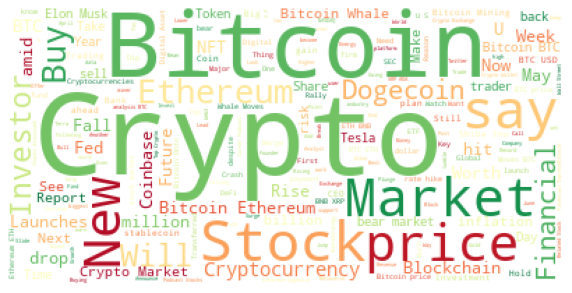

In [561]:
wc1 = WordCloud(colormap='RdYlGn', background_color='white').generate_from_text(''.join(flatTitleBTC))
plt.figure(figsize=(10, 8))
plt.axis("off")
_ = plt.imshow(wc1)

## Title ETH

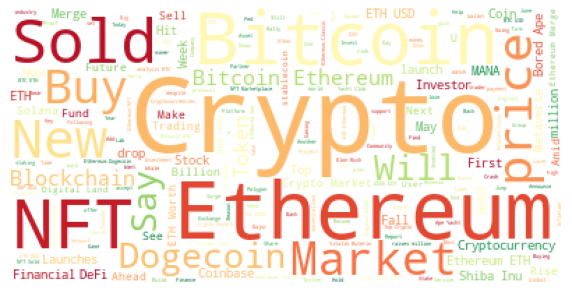

In [562]:
wc1 = WordCloud(colormap='RdYlGn', background_color='white').generate_from_text(''.join(flatTitleETH))
plt.figure(figsize=(10, 8))
plt.axis("off")
_ = plt.imshow(wc1)

## Summary BTC

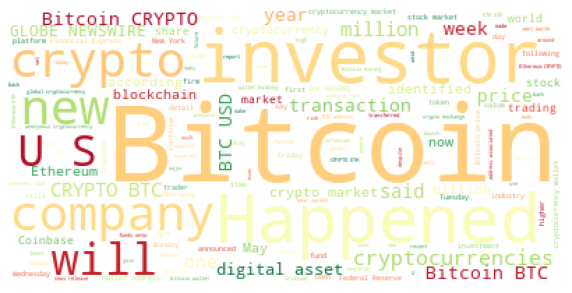

In [563]:
wc1 = WordCloud(colormap='RdYlGn', background_color='white').generate_from_text(''.join(flatsumBTC))
plt.figure(figsize=(10, 8))
plt.axis("off")
_ = plt.imshow(wc1)

## Summary ETH

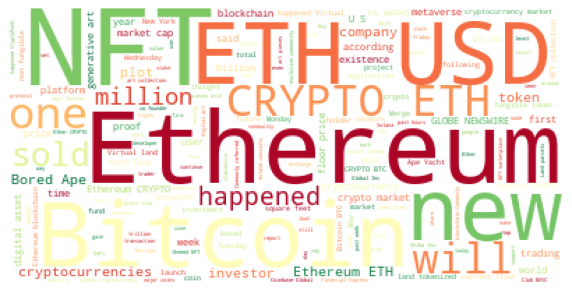

In [564]:
wc1 = WordCloud(colormap='RdYlGn', background_color='white').generate_from_text(''.join(flatsumETH))
plt.figure(figsize=(10, 8))
plt.axis("off")
_ = plt.imshow(wc1)